In [20]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas
import requests
import numpy
from scipy.stats import linregress 
import seaborn as sns

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Input cvs raw data to data frames
delays_df = pd.read_csv("Airline_Delay_Cause_cleaned.csv")
delays_df.head()

,ID,year,month,carrier,carrier_name,airport,airport_name,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,1,2024,5,UA,United Airline,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",637.0,52.27,9.44,62.80,0.0,68.49,9.0,1.0
1,2,2024,5,UA,United Airline,AUS,"Austin, TX: Austin - Bergstrom International",780.0,62.17,10.39,67.55,0.0,76.88,13.0,4.0
2,3,2024,5,UA,United Airline,BNA,"Nashville, TN: Nashville International",603.0,45.67,6.26,45.91,0.0,58.15,3.0,3.0
3,4,2024,5,UA,United Airline,BOS,"Boston, MA: Logan International",1092.0,75.30,22.35,124.17,0.0,87.19,14.0,4.0
4,5,2024,5,UA,United Airline,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",326.0,29.85,2.95,15.36,0.0,30.83,3.0,0.0


In [10]:
# Display data type for columns
delays_df.dtypes

ID                    int64
year                  int64
month                 int64
carrier              object
carrier_name         object
airport              object
airport_name         object
arr_flights         float64
carrier_ct          float64
weather_ct          float64
nas_ct              float64
security_ct         float64
late_aircraft_ct    float64
arr_cancelled       float64
arr_diverted        float64
dtype: object

In [11]:
# Convert NaN values with 0 and then convert all float columns to integers
delays_df = delays_df.fillna(0).apply(lambda x: x.astype(int) if x.dtype == 'float64' else x)

In [12]:
# Calculate the sum for 'arr_flights' grouped by 'year' and 'carrier_name'
carrier_sum_year = delays_df.groupby(['year', 'carrier_name'])['arr_flights'].sum().reset_index()
carrier_sum_year = carrier_sum_year.rename(columns={'arr_flights': 'Total Flights'})

# Calculate the sum for 'carrier_ct' grouped by 'year' and 'carrier_name'
carrier_ct_year = delays_df.groupby(['year', 'carrier_name'])['carrier_ct'].sum().reset_index()

# Calculate the sum for 'weather_ct' grouped by 'year' and 'carrier_name'
weather_ct_year = delays_df.groupby(['year', 'carrier_name'])['weather_ct'].sum().reset_index()

# Calculate the sum for 'nas_ct' grouped by 'year' and 'carrier_name'
nas_ct_year = delays_df.groupby(['year', 'carrier_name'])['nas_ct'].sum().reset_index()

# Calculate the sum for 'security_ct' grouped by 'year' and 'carrier_name'
security_ct_year = delays_df.groupby(['year', 'carrier_name'])['security_ct'].sum().reset_index()

# Calculate the sum for 'late_aircraft_ct' grouped by 'year' and 'carrier_name'
late_aircraft_ct_year = delays_df.groupby(['year', 'carrier_name'])['late_aircraft_ct'].sum().reset_index()

# Calculate the sum for 'arr_cancelled' grouped by 'year' and 'carrier_name'
arr_cancelled_year = delays_df.groupby(['year', 'carrier_name'])['arr_cancelled'].sum().reset_index()

# Calculate the sum for 'arr_diverted' grouped by 'year' and 'carrier_name'
arr_diverted_year = delays_df.groupby(['year', 'carrier_name'])['arr_diverted'].sum().reset_index()

# Append 'carrier_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_carrier_ct'] = carrier_ct_year['carrier_ct']

# Append 'weather_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_weather_ct'] = weather_ct_year['weather_ct']

# Append 'nas_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_nas_ct'] = nas_ct_year['nas_ct']

# Append 'security_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_security_ct'] = security_ct_year['security_ct']

# Append 'late_aircraft_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_late_aircraft_ct'] = late_aircraft_ct_year['late_aircraft_ct']

# Append 'arr_cancelled' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_arr_cancelled'] = arr_cancelled_year['arr_cancelled']

# Append 'arr_diverted' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_arr_diverted'] = arr_diverted_year['arr_diverted']

# Calculate the sum of all delays and append it as a new column
carrier_sum_year['Total Delays'] = (
    carrier_sum_year['sum_carrier_ct'] +
    carrier_sum_year['sum_weather_ct'] +
    carrier_sum_year['sum_nas_ct'] +
    carrier_sum_year['sum_security_ct'] +
    carrier_sum_year['sum_late_aircraft_ct'] +
    carrier_sum_year['sum_arr_cancelled'] +
    carrier_sum_year['sum_arr_diverted']
)

# Renaming the columns
carrier_sum_year.rename(columns={
    'sum_carrier_ct': 'Carrier Delay',
    'sum_weather_ct': 'Weather Delay',
    'sum_nas_ct': 'NAS Delay',
    'sum_security_ct': 'Security Delay',
    'sum_late_aircraft_ct': 'Late Aircraft Delay',
    'sum_arr_cancelled': 'Cancelled Flights',
    'sum_arr_diverted': 'Diverted Flights',
    'on_time_arrivals': 'On-Time Flights',
    'carrier_name': 'Airline'

}, inplace=True)

# Calculate on-time arrivals by subtracting total delays from sum_arr_flights
carrier_sum_year['On-Time Flights'] = carrier_sum_year['Total Flights'] - carrier_sum_year['Total Delays']

#Calculate % of on-time arrivals
carrier_sum_year['% On-Time Flights'] = carrier_sum_year['On-Time Flights'] / carrier_sum_year['Total Flights'] * 100

# Display the resulting DataFrame
carrier_sum_year

,year,Airline,Total Flights,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay,Cancelled Flights,Diverted Flights,Total Delays,On-Time Flights,% On-Time Flights
0,2019,American Airline,522676,30738,3534,34144,157,37729,11321,1553,119176,403500,77.198877
1,2019,Delta Airline,524423,22410,2509,31884,53,22483,994,1365,81698,442725,84.421355
2,2019,Southwest Airline,496347,27361,1645,20248,273,35910,8580,1198,95215,401132,80.816848
3,2019,United Airline,352955,14963,2733,32577,13,25282,2805,1289,79662,273293,77.429984
4,2020,American Airline,467442,16556,1578,17006,197,11290,27697,784,75108,392334,83.932124
5,2020,Delta Airline,456450,13171,1057,16532,89,7844,21874,632,61199,395251,86.592398
6,2020,Southwest Airline,528219,10917,648,9190,80,9285,43144,572,73836,454383,86.021707
7,2020,United Airline,258770,6335,718,9243,1,5975,18499,360,41131,217639,84.105190
8,2021,American Airline,590611,34876,3989,25157,547,30411,12772,1739,109491,481120,81.461402
9,2021,Delta Airline,585041,26880,2218,20788,246,15308,2952,1033,69425,515616,88.133310


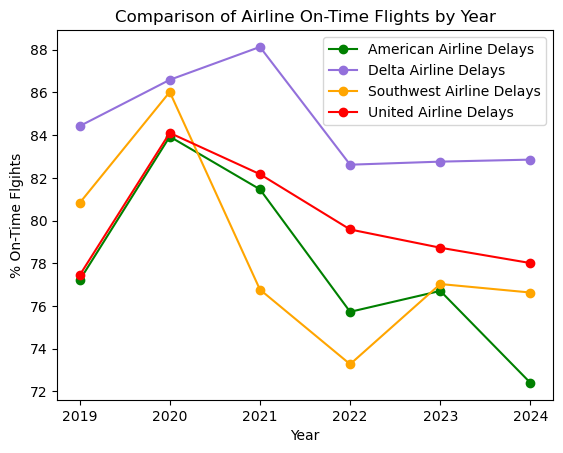

In [18]:
# Define colors for each airline
airline_colors = {
    'American Airline': 'green',
    'Delta Airline': 'mediumpurple',
    'Southwest Airline': 'orange',
    'United Airline': 'red'
}

# Plotting the line chart for each airline's ontime flights with the specified colors
for idx, airline in enumerate(carrier_sum_year['Airline'].unique()):
    airline_cleaned = airline.strip()  # Remove extra spaces
    subset = carrier_sum_year[carrier_sum_year['Airline'] == airline]
    plt.plot(subset['year'], subset['% On-Time Flights'], marker='o', label=f'{airline} Delays', color=airline_colors.get(airline_cleaned, 'gray'))

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('% On-Time Flgihts')
plt.title('Comparison of Airline On-Time Flights by Year')

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Position legend box 
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.legend(loc='upper right')


# Show the plot
plt.show()

# According to the International Air Transport Association (IATA), on-time performance (OTP) is a critical indicator of an airline's reliability and is typically defined as the percentage of flights that arrive and depart within 15 minutes of their scheduled time. 
# The data collected and analyzed for on-time flights showed an increased during 2020 and into 2021
# This is the result of a reduction in flights during COVID. A reduction in flights will minimize airport traffic making it speedier to get through security as well as the boarding process at the gate. It will also reduce the amount of air traffic which allows for on-time flights.

In [21]:
# Input cvs raw data to data frames
delays_df = pd.read_csv("Airline_Delay_Cause.csv")
delays_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,5,G7,GoJet Airlines LLC d/b/a United Express,ORD,"Chicago, IL: Chicago O'Hare International",621.0,128.0,24.75,12.43,...,0.00,36.72,7.0,10.0,15126.0,1707.0,3005.0,4454.0,0.0,5960.0
1,2024,5,HA,Hawaiian Airlines Network,AUS,"Austin, TX: Austin - Bergstrom International",15.0,3.0,3.00,0.00,...,0.00,0.00,0.0,0.0,135.0,135.0,0.0,0.0,0.0,0.0
2,2024,5,HA,Hawaiian Airlines Network,BOS,"Boston, MA: Logan International",20.0,8.0,6.19,0.07,...,0.90,0.85,0.0,0.0,609.0,313.0,17.0,0.0,233.0,46.0
3,2024,5,HA,Hawaiian Airlines Network,JFK,"New York, NY: John F. Kennedy International",31.0,8.0,7.57,0.00,...,0.43,0.00,0.0,0.0,274.0,262.0,0.0,0.0,12.0,0.0
4,2024,5,HA,Hawaiian Airlines Network,LAS,"Las Vegas, NV: Harry Reid International",124.0,14.0,11.00,1.00,...,0.00,2.00,1.0,0.0,543.0,420.0,27.0,0.0,0.0,96.0


In [22]:
# Display data columns
print(delays_df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')



Number of entries per carrier in the filtered DataFrame:
carrier_name
Delta Air Lines Network      1822
American Airlines Network    1768
United Air Lines Network     1716
Southwest Airlines           1592
Name: count, dtype: int64

Average Arrival Delays for Selected Carriers:
carrier_name
American Airlines Network    28813.447964
Southwest Airlines           20759.460427
Delta Air Lines Network      17977.544457
United Air Lines Network     17266.699125
Name: arr_delay, dtype: float64


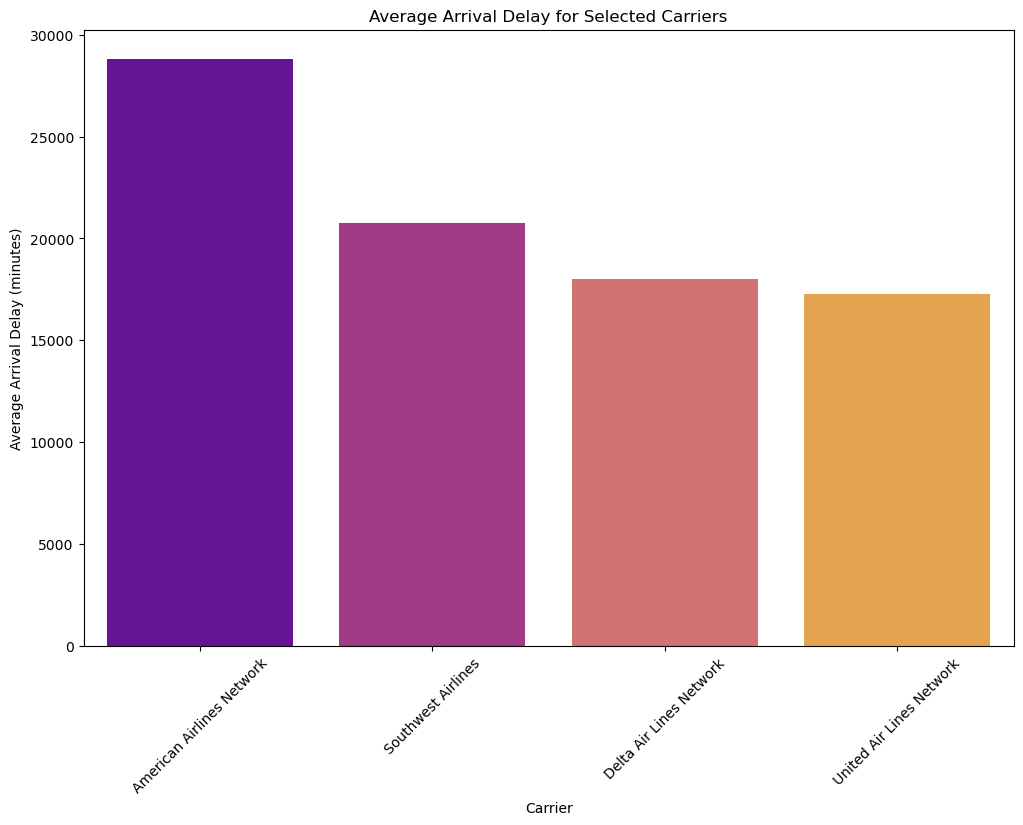

In [23]:
# List of carriers to filter
target_carriers = ['Southwest Airlines','Delta Air Lines Network', 'United Air Lines Network','American Airlines Network']

# Filter the DataFrame for the specified carriers
filtered_df = delays_df[delays_df['carrier_name'].isin(target_carriers)]

# Check the number of entries for each carrier after filtering
print("\nNumber of entries per carrier in the filtered DataFrame:")
print(filtered_df['carrier_name'].value_counts())

# Calculate average arrival delay by carrier for the filtered data
carrier_delay = filtered_df.groupby('carrier_name')['arr_delay'].mean().sort_values(ascending=False)

# Display average delays for the specified carriers
print("\nAverage Arrival Delays for Selected Carriers:")
print(carrier_delay)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette='plasma')
plt.xticks(rotation=45)
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay for Selected Carriers')
plt.show()

In [24]:
# Summarize the data by airport
airport_delay_summary = delays_df.groupby(['airport', 'airport_name']).agg({
  'arr_flights': 'sum',
   'arr_del15': 'sum'
     }).reset_index()

# Calculate the delay rate (percentage of delayed flights)
airport_delay_summary['delay_rate'] = (airport_delay_summary['arr_del15'] / airport_delay_summary['arr_flights']) * 100

# Sort airports by delay rate in descending order to find those with the highest rates
top_airports_by_delay_rate = airport_delay_summary.sort_values(by='delay_rate', ascending=False).head(10)

# Print the top 10 airports by delay rate
print("Top 10 US Airports by Delay Rate:")
print(top_airports_by_delay_rate[['airport', 'airport_name', 'arr_flights', 'arr_del15', 'delay_rate']])

Top 10 US Airports by Delay Rate:
   airport                                       airport_name  arr_flights  \
15     LAS            Las Vegas, NV: Harry Reid International     344036.0   
19     MCO                 Orlando, FL: Orlando International     705925.0   
10     EWR           Newark, NJ: Newark Liberty International     645994.0   
11     FLL  Fort Lauderdale, FL: Fort Lauderdale-Hollywood...     431563.0   
14     JFK        New York, NY: John F. Kennedy International     544103.0   
30     TPA                     Tampa, FL: Tampa International     357771.0   
3      BOS                    Boston, MA: Logan International     606482.0   
1      AUS       Austin, TX: Austin - Bergstrom International     365609.0   
21     MIA                     Miami, FL: Miami International     466432.0   
28     SFO     San Francisco, CA: San Francisco International     632514.0   

    arr_del15  delay_rate  
15    85663.0   24.899429  
19   158311.0   22.426037  
10   144516.0   22.3711

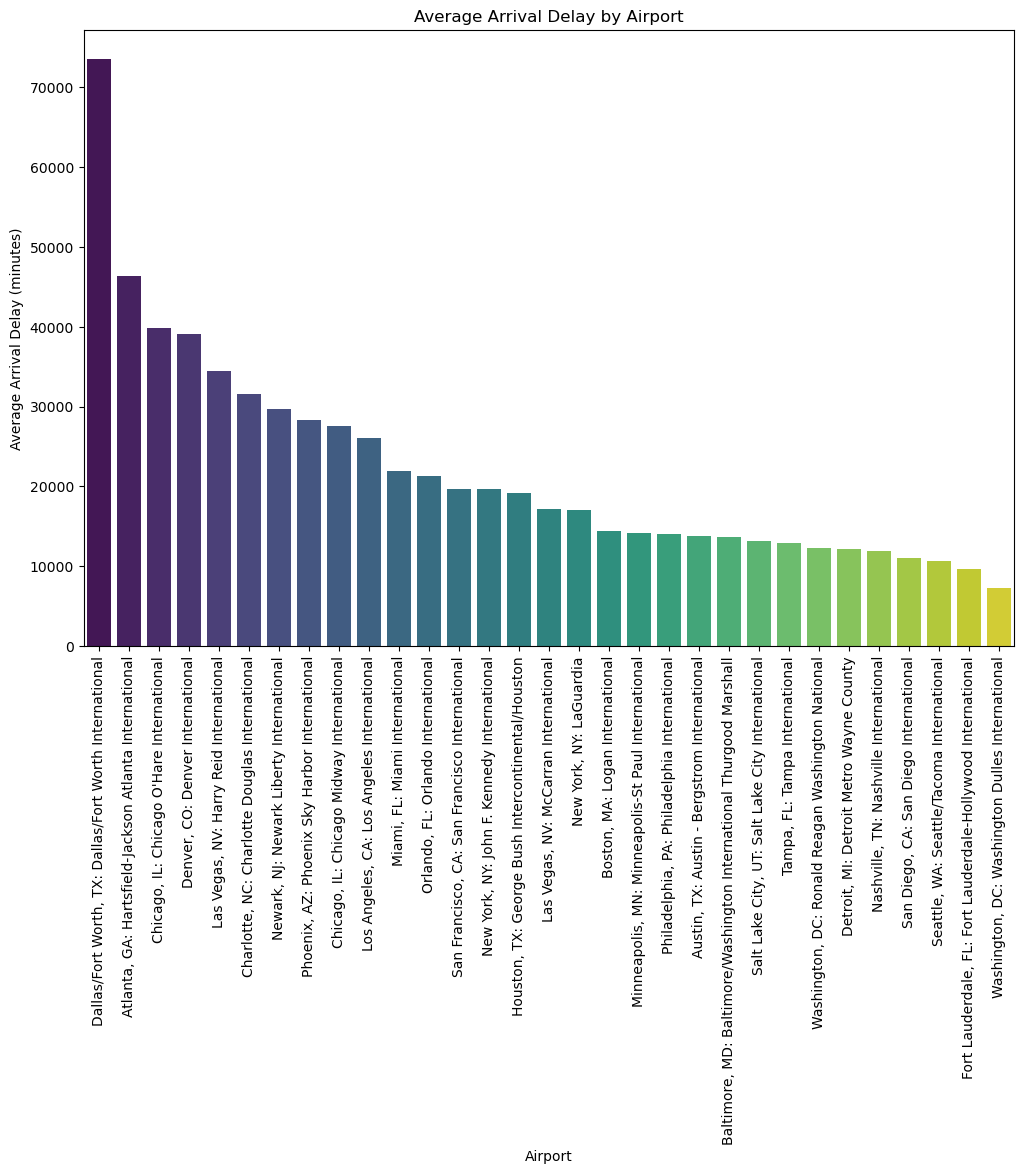

In [25]:
airport_delay = filtered_df.groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=airport_delay.index, y=airport_delay.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Airport')
plt.show()

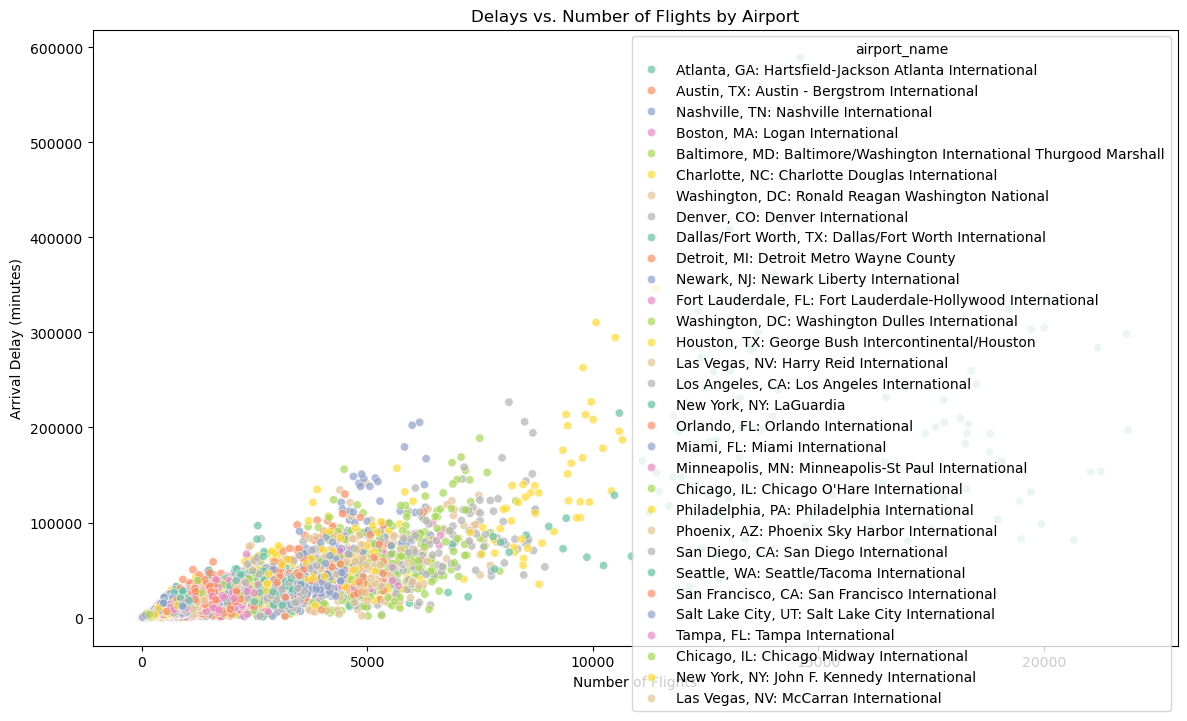

In [26]:
# Plot delays vs. number of flights
plt.figure(figsize=(14, 8))
sns.scatterplot(x='arr_flights', y='arr_delay', data=filtered_df, hue='airport_name', palette='Set2', alpha=0.7)
plt.xlabel('Number of Flights')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Delays vs. Number of Flights by Airport')
plt.show()

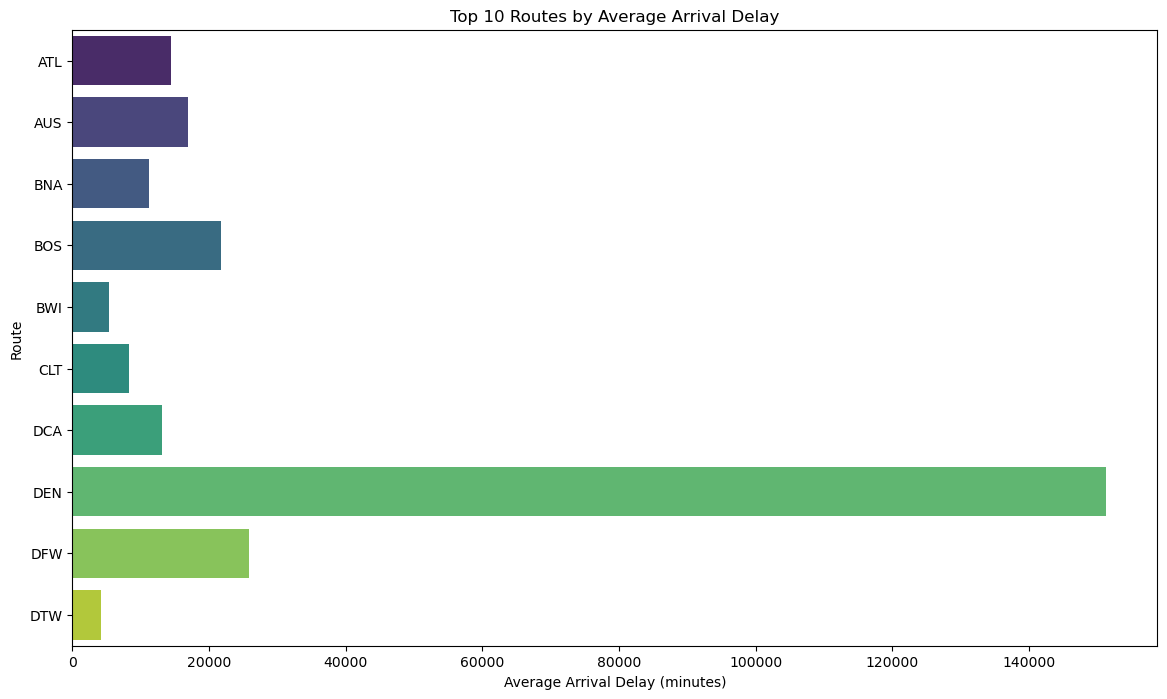

In [27]:
# Plot average arrival delays by route
plt.figure(figsize=(14, 8))
sns.barplot(x='arr_delay', y='airport', data=filtered_df.head(10), palette='viridis')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Route')
plt.title('Top 10 Routes by Average Arrival Delay')
plt.show()

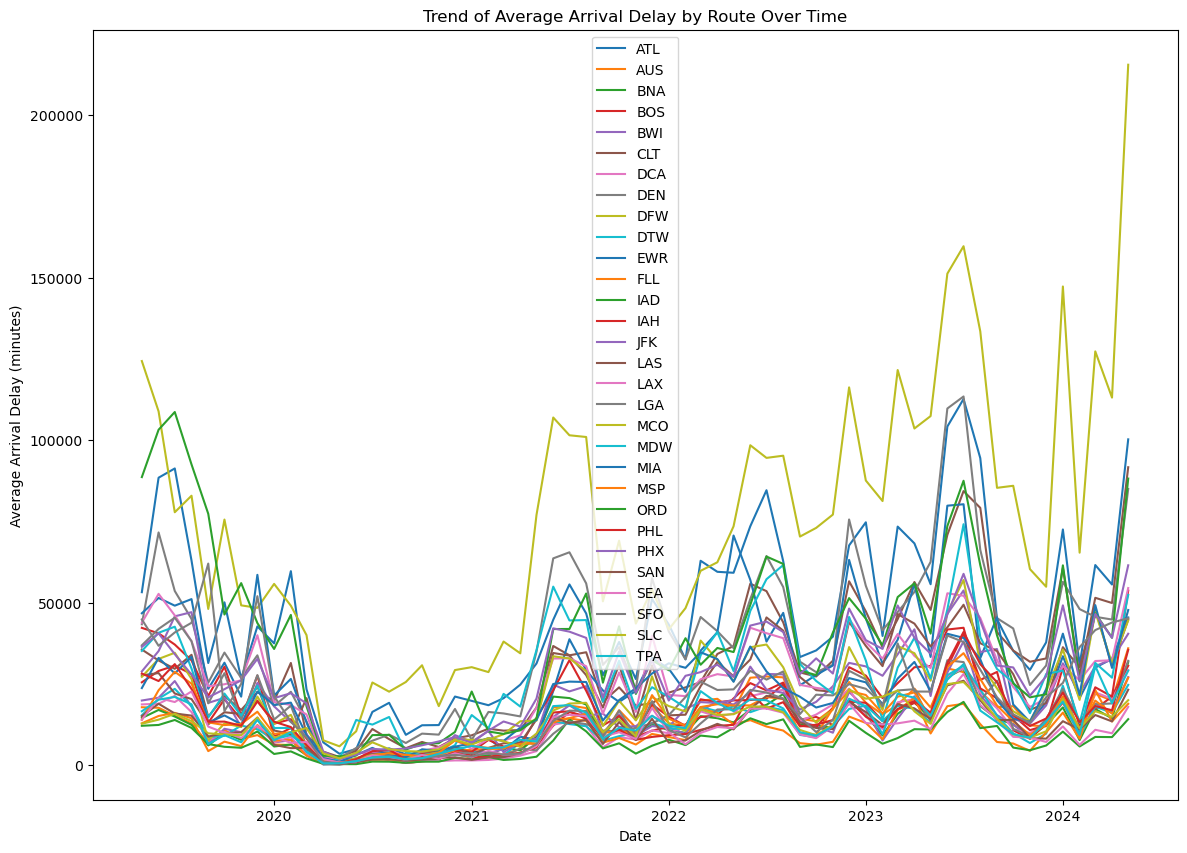

In [28]:
# Assuming 'year' and 'month' columns are available for time-based analysis
filtered_df['date'] = pd.to_datetime(filtered_df[['year', 'month']].assign(day=1))

# Calculate average monthly delay per route
monthly_delays = filtered_df.groupby(['date', 'airport'])['arr_delay'].mean().reset_index()

# Plot the trend of delays over time for top routes
plt.figure(figsize=(14, 10))
for airport in monthly_delays['airport'].unique():
    route_data = monthly_delays[monthly_delays['airport'] == airport]
    plt.plot(route_data['date'], route_data['arr_delay'], label=airport)

plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Trend of Average Arrival Delay by Route Over Time')
plt.legend()
plt.show()

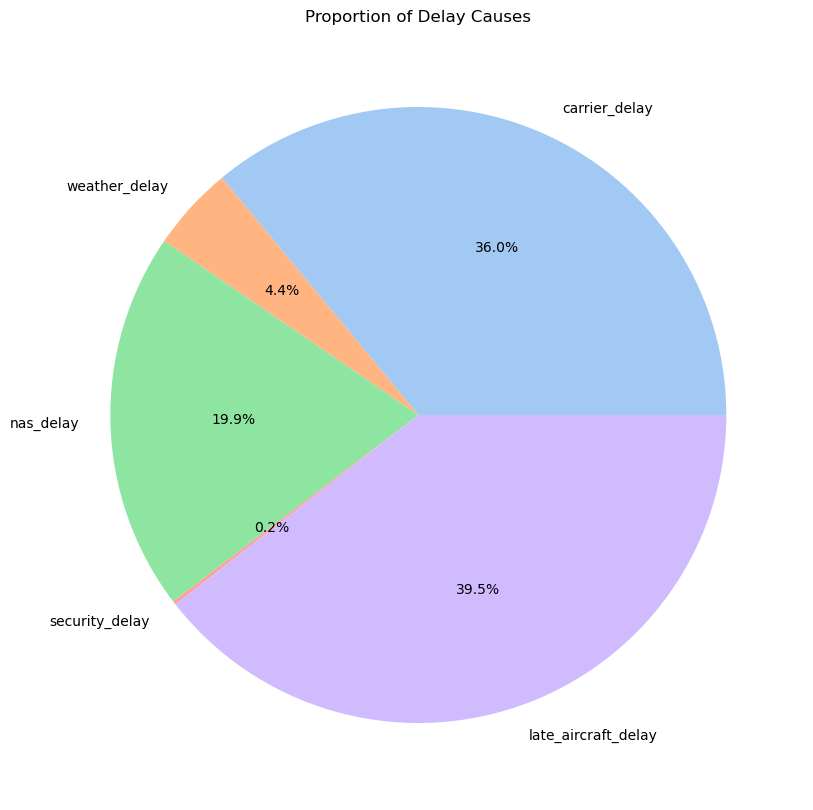

In [29]:
# Aggregate delay causes for a specific route or all routes
route_delay_causes = filtered_df.groupby('airport').agg({
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).sum()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(route_delay_causes, labels=route_delay_causes.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Delay Causes')
plt.show()

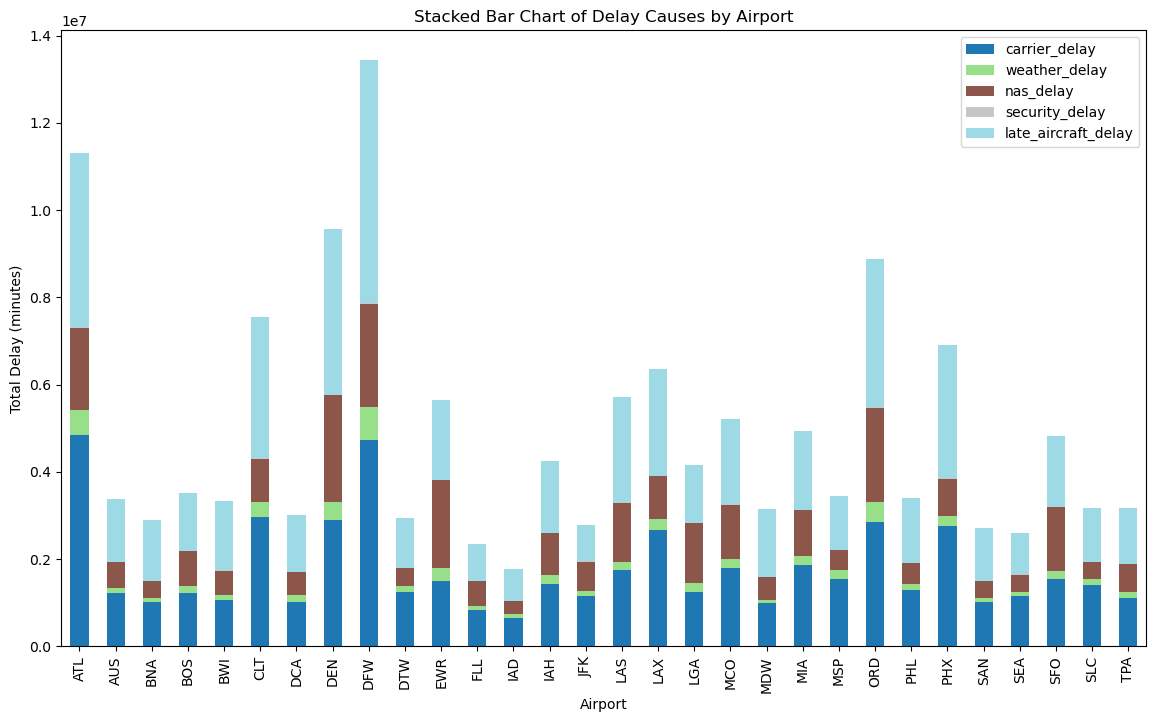

In [30]:
# Calculate total delay causes by route
delay_causes_by_route = filtered_df.groupby(['airport']).agg({
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

# Plot stacked bar chart
delay_causes_by_route.set_index('airport').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.xlabel('Airport')
plt.ylabel('Total Delay (minutes)')
plt.title('Stacked Bar Chart of Delay Causes by Airport')
plt.xticks(rotation=90)
plt.show()

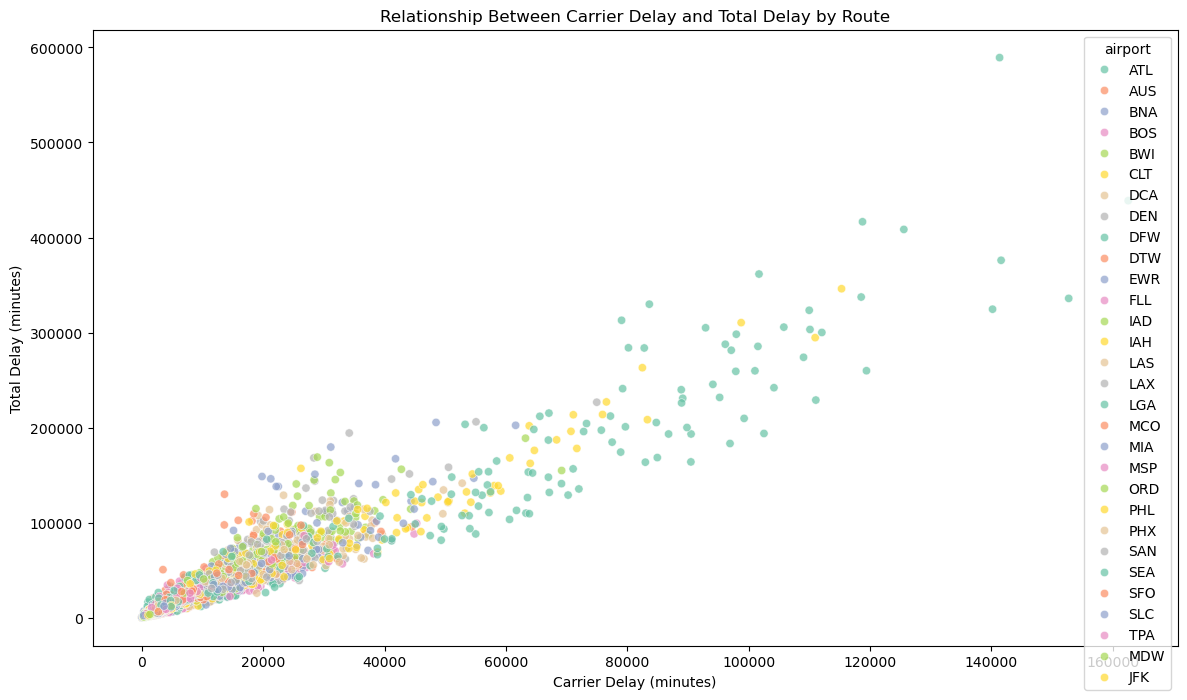

In [31]:
# Scatter plot of total delays vs. carrier delays by route
plt.figure(figsize=(14, 8))
sns.scatterplot(x='carrier_delay', y='arr_delay', data=filtered_df, hue='airport', palette='Set2', alpha=0.7)
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Total Delay (minutes)')
plt.title('Relationship Between Carrier Delay and Total Delay by Route')
plt.show()

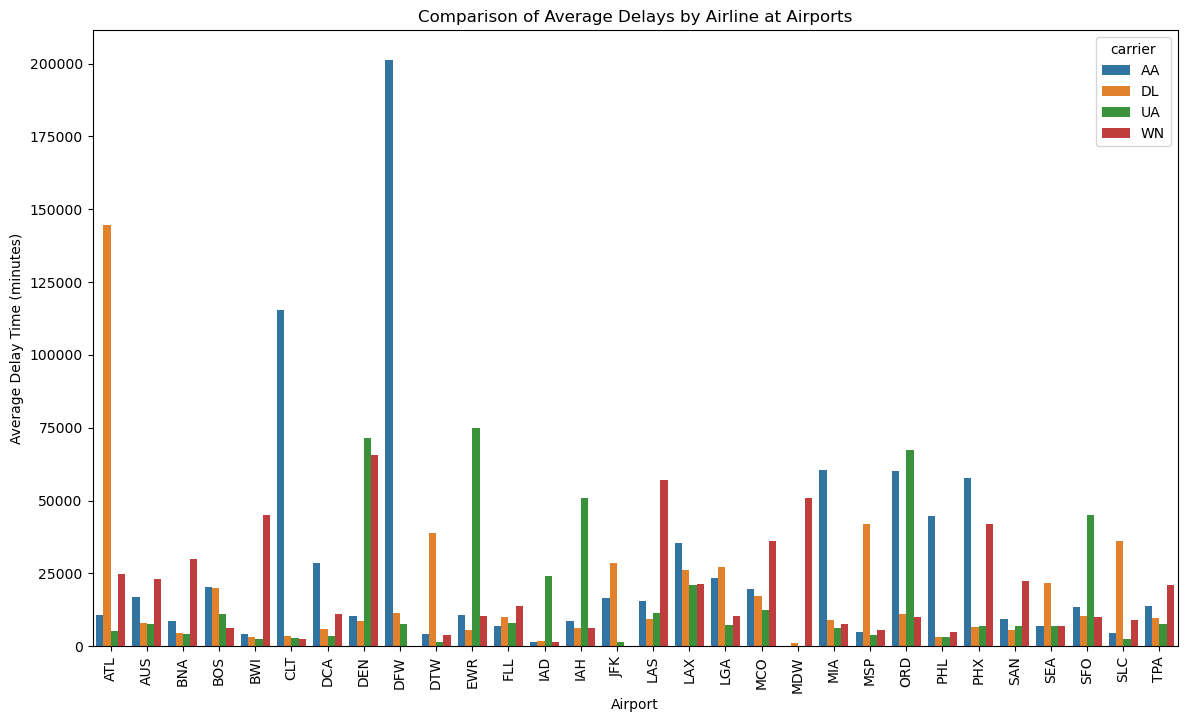

In [32]:
# Compare delays at major airports across airlines
airline_comparison = filtered_df.groupby(['airport', 'carrier'])['arr_delay'].mean().unstack()

# Reset index to get a DataFrame with 'airport' and 'carrier' as columns
df_reset = airline_comparison.reset_index()

# Melt DataFrame to get a long format suitable for seaborn
df_melted = df_reset.melt(id_vars='airport', var_name='carrier', value_name='arr_delay')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='airport', y='arr_delay', hue='carrier', data=df_melted)
plt.xlabel('Airport')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Comparison of Average Delays by Airline at Airports')
plt.xticks(rotation=90)
plt.show()

AIRLINE ANALYSIS:

1. Delays are more common at the primary hubs of each airline most likely because of the high volume of traffic and congestion typical in these areas.
2. Airports like DFW (Dallas-Fort Worth) and ATL (Atlanta) showed high total delays, with a significant portion attributed to carrier delays and late aircraft delays.
3. NAS delays were particularly prevalent at airports like DEN (Denver) and ORD (Chicago O'Hare), indicating that air traffic control issues or airspace congestion are major contributors to delays at these locations.
4. Understanding the primary delay causes allows airports to implement targeted improvements. For example, airports with high NAS delays should work on enhancing air traffic management systems.
5. Weather delays were also significant at certain airports, especially those prone to adverse weather conditions, like ATL and ORD.

In [36]:
# Input cvs raw data to data frames
delays_df = pd.read_csv("Airline_Delay_Cause_renamed.csv")
delays_df.head()

,ID,year,month,carrier,carrier_name,airport,airport_name,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,1,2024,5,UA,United Airlines,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",637.0,52.27,9.44,62.80,0.0,68.49,9.0,1.0
1,2,2024,5,UA,United Airlines,AUS,"Austin, TX: Austin - Bergstrom International",780.0,62.17,10.39,67.55,0.0,76.88,13.0,4.0
2,3,2024,5,UA,United Airlines,BNA,"Nashville, TN: Nashville International",603.0,45.67,6.26,45.91,0.0,58.15,3.0,3.0
3,4,2024,5,UA,United Airlines,BOS,"Boston, MA: Logan International",1092.0,75.30,22.35,124.17,0.0,87.19,14.0,4.0
4,5,2024,5,UA,United Airlines,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",326.0,29.85,2.95,15.36,0.0,30.83,3.0,0.0


In [39]:
# Calculate the sum for 'arr_flights' grouped by 'year' and 'carrier_name'
carrier_sum_year = delays_df.groupby(['year', 'carrier_name'])['arr_flights'].sum().reset_index()
carrier_sum_year = carrier_sum_year.rename(columns={'arr_flights': 'Total Flights'})

# Calculate the sum for 'carrier_ct' grouped by 'year' and 'carrier_name'
carrier_ct_year = delays_df.groupby(['year', 'carrier_name'])['carrier_ct'].sum().reset_index()

# Calculate the sum for 'weather_ct' grouped by 'year' and 'carrier_name'
weather_ct_year = delays_df.groupby(['year', 'carrier_name'])['weather_ct'].sum().reset_index()

# Calculate the sum for 'nas_ct' grouped by 'year' and 'carrier_name'
nas_ct_year = delays_df.groupby(['year', 'carrier_name'])['nas_ct'].sum().reset_index()

# Calculate the sum for 'security_ct' grouped by 'year' and 'carrier_name'
security_ct_year = delays_df.groupby(['year', 'carrier_name'])['security_ct'].sum().reset_index()

# Calculate the sum for 'late_aircraft_ct' grouped by 'year' and 'carrier_name'
late_aircraft_ct_year = delays_df.groupby(['year', 'carrier_name'])['late_aircraft_ct'].sum().reset_index()

# Calculate the sum for 'arr_cancelled' grouped by 'year' and 'carrier_name'
arr_cancelled_year = delays_df.groupby(['year', 'carrier_name'])['arr_cancelled'].sum().reset_index()

# Calculate the sum for 'arr_diverted' grouped by 'year' and 'carrier_name'
arr_diverted_year = delays_df.groupby(['year', 'carrier_name'])['arr_diverted'].sum().reset_index()

# Append 'carrier_ct' sum as a new column
carrier_sum_year.loc[:, 'sum_carrier_ct'] = carrier_ct_year['carrier_ct']

# Append 'weather_ct' sum as a new column 
carrier_sum_year.loc[:, 'sum_weather_ct'] = weather_ct_year['weather_ct']

# Append 'nas_ct' sum as a new column
carrier_sum_year.loc[:, 'sum_nas_ct'] = nas_ct_year['nas_ct']

# Append 'security_ct' sum as a new columnc
carrier_sum_year.loc[:, 'sum_security_ct'] = security_ct_year['security_ct']

# Append 'late_aircraft_ct' sum as a new column
carrier_sum_year.loc[:, 'sum_late_aircraft_ct'] = late_aircraft_ct_year['late_aircraft_ct']

# Append 'arr_cancelled' sum as a new column
carrier_sum_year.loc[:, 'sum_arr_cancelled'] = arr_cancelled_year['arr_cancelled']

# Append 'arr_diverted' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_arr_diverted'] = arr_diverted_year['arr_diverted']

# Calculate the sum of all delays and append it as a new column
carrier_sum_year['Total Delays'] = (
    carrier_sum_year['sum_carrier_ct'] +
    carrier_sum_year['sum_weather_ct'] +
    carrier_sum_year['sum_nas_ct'] +
    carrier_sum_year['sum_security_ct'] +
    carrier_sum_year['sum_late_aircraft_ct'] 
)

# Renaming the columns
carrier_sum_year.rename(columns={
    'sum_carrier_ct': 'Carrier Delay',
    'sum_weather_ct': 'Weather Delay',
    'sum_nas_ct': 'NAS Delay',
    'sum_security_ct': 'Security Delay',
    'sum_late_aircraft_ct': 'Late Aircraft Delay',
    'sum_arr_cancelled': 'Cancelled Flights',
    'sum_arr_diverted': 'Diverted Flights',
    'on_time_arrivals': 'On-Time Flights',
    'carrier_name': 'Airlines'

}, inplace=True)

# Calculate on-time arrivals by subtracting total delays from sum_arr_flights
carrier_sum_year['On-Time Flights'] = carrier_sum_year['Total Flights'] - (carrier_sum_year['Total Delays'] + carrier_sum_year['Cancelled Flights'] + carrier_sum_year['Diverted Flights'])

carrier_sum_year.to_csv('output/All_Airlines_Delays_2019_2024.csv', index=False)

# Display the resulting DataFrame
carrier_sum_year

,year,Airlines,Total Flights,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay,Cancelled Flights,Diverted Flights,Total Delays,On-Time Flights
0,2019,American Airlines,522676.0,30853.69,3640.25,34256.81,223.01,37842.13,11321.0,1553.0,106815.89,402986.11
1,2019,Delta Airlines,524423.0,22531.85,2619.33,32009.37,72.21,22610.07,994.0,1365.0,79842.83,442221.17
2,2019,Southwest Airlines,496347.0,27455.86,1743.90,20342.48,333.75,36007.16,8580.0,1198.0,85883.15,400685.85
3,2019,United Airlines,352955.0,15074.68,2834.33,32678.62,18.20,25393.30,2805.0,1289.0,75999.13,272861.87
4,2020,American Airlines,467442.0,16726.27,1716.09,17177.41,261.89,11453.30,27697.0,784.0,47334.96,391626.04
5,2020,Delta Airlines,456450.0,13349.53,1172.75,16680.97,114.16,7998.56,21874.0,632.0,39315.97,394628.03
6,2020,Southwest Airlines,528219.0,11059.27,750.58,9323.56,108.52,9420.20,43144.0,572.0,30662.13,453840.87
7,2020,United Airlines,258770.0,6462.96,809.17,9365.09,2.03,6101.76,18499.0,360.0,22741.01,217169.99
8,2021,American Airlines,590611.0,35050.54,4146.80,25332.42,659.35,30583.76,12772.0,1739.0,95772.87,480327.13
9,2021,Delta Airlines,585041.0,27045.99,2383.12,20958.30,299.89,15484.65,2952.0,1033.0,66171.95,514884.05


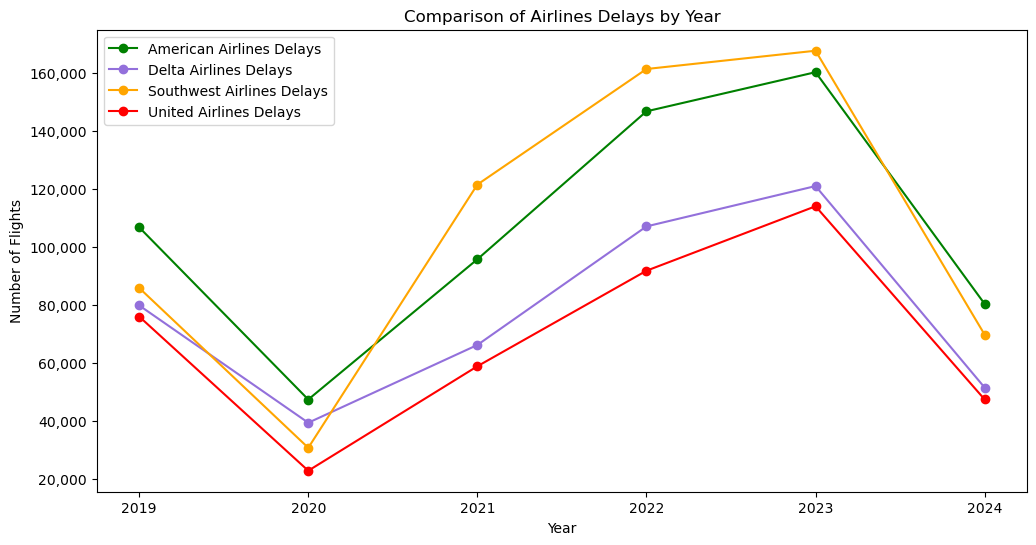

In [40]:
# Define colors for each airline
airline_colors = {
    'American Airlines': 'green',
    'Delta Airlines': 'mediumpurple',
    'Southwest Airlines': 'orange',
    'United Airlines': 'red'
}
# Create the bar chart with side-by-side bars
plt.figure(figsize=(12, 6))

# Plotting the line chart for each airline's delays with the specified colors
for idx, airline in enumerate(carrier_sum_year['Airlines'].unique()):
    airline_cleaned = airline.strip()  # Remove extra spaces
    subset = carrier_sum_year[carrier_sum_year['Airlines'] == airline]
    plt.plot(subset['year'], subset['Total Delays'], marker='o', label=f'{airline} Delays', color=airline_colors.get(airline_cleaned, 'gray'))

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Comparison of Airlines Delays by Year')

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Position legend box 
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Airlines_Delays_Comparison.png', bbox_inches='tight')

# Show the plot
plt.show()

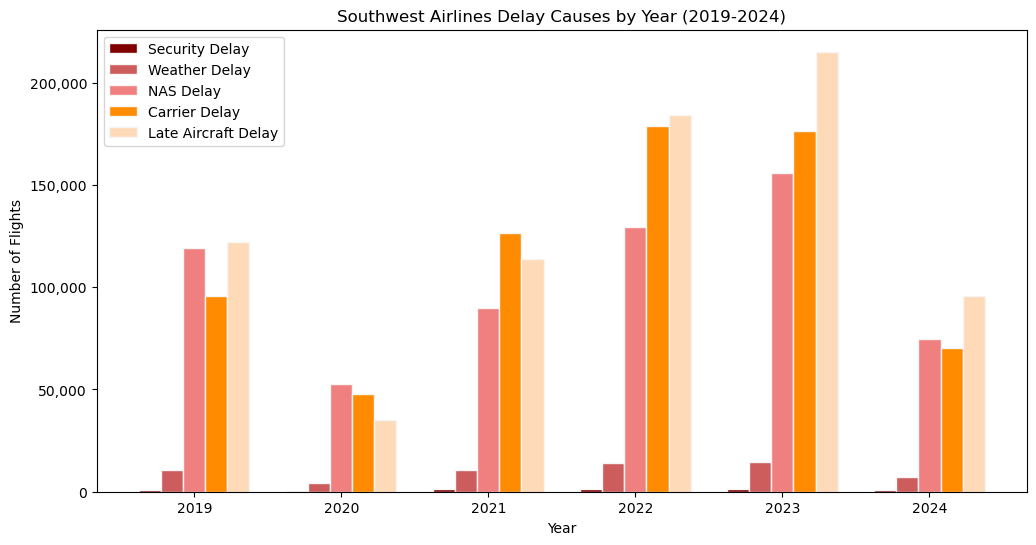

In [41]:
# Filter data for Southwest Airline and for years 2019-2024
southwest_data = carrier_sum_year[
    (carrier_sum_year['Airlines'].str.strip().str.lower() == 'southwest airlines') &
    (carrier_sum_year['year'].between(2019, 2024))
]

# Export the filtered data to a CSV file
southwest_data.to_csv('output/Southwest_Airlines_Delays_2019_2024.csv', index=False)

# Group data by Southwest airline, year and sum the delay causes
southwest_totals_by_year = carrier_sum_year.groupby('year').sum()

# Prepare the data for plotting
delay_causes = ['Security Delay', 'Weather Delay', 'NAS Delay', 'Carrier Delay',  'Late Aircraft Delay']
years = southwest_totals_by_year.index
bar_width = 0.15

# Colors for each type of delay
colors = {
    'Security Delay': 'maroon',
    'Weather Delay': 'indianred',
    'NAS Delay': 'lightcoral',
    'Carrier Delay': 'darkorange',
    'Late Aircraft Delay': 'peachpuff',
}

# Create the bar chart with side-by-side bars
plt.figure(figsize=(12, 6))

# Generate bars for each delay cause with the same color across all years
for i, cause in enumerate(delay_causes):
    plt.bar(
        [year + i * bar_width for year in years], 
        southwest_totals_by_year[cause], 
        width=bar_width, 
        label=cause, 
        color=colors[cause],
        edgecolor='whitesmoke'
    )

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Southwest Airlines Delay Causes by Year (2019-2024)')
plt.xticks([year + bar_width * 2 for year in years], years)  # Center the x-ticks
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Southwest_Airlines_Delay_Causes_by_Year.png', bbox_inches='tight')

# Show the plot
plt.show()

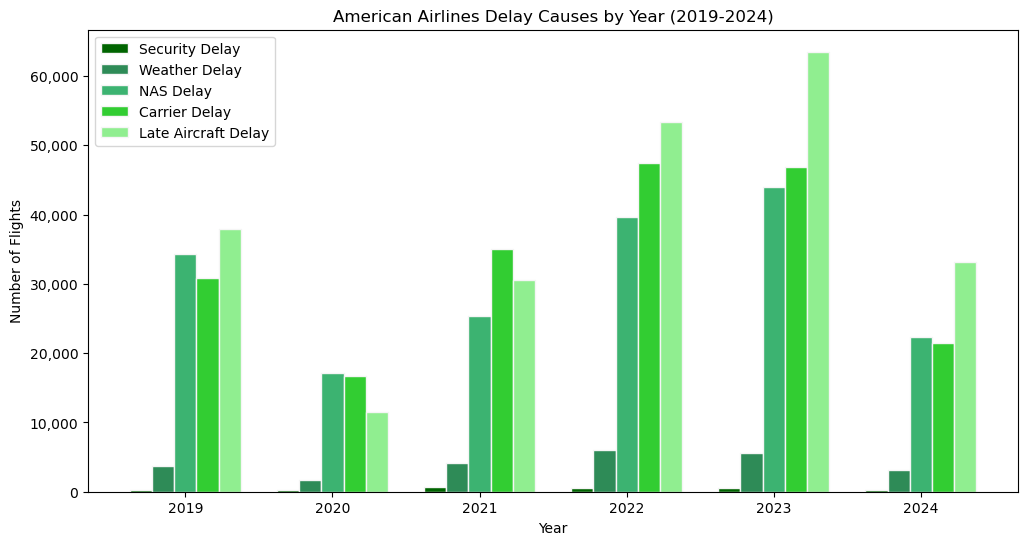

In [42]:
# Filter data for American Airline and for years 2019-2024
american_data = carrier_sum_year[
    (carrier_sum_year['Airlines'].str.strip().str.lower() == 'american airlines') &
    (carrier_sum_year['year'].between(2019, 2024))
]

# Export the filtered data to a CSV file
american_data.to_csv('output/American_Airlines_Delays_2019_2024.csv', index=False)

# Group data by American airline, year and sum the delay causes
american_totals_by_year = american_data.groupby('year').sum()

# Prepare the data for plotting
delay_causes = ['Security Delay', 'Weather Delay', 'NAS Delay', 'Carrier Delay',  'Late Aircraft Delay']
years = american_totals_by_year.index
bar_width = 0.15

# Colors for each type of delay
colors = {
    'Security Delay': 'darkgreen',
    'Weather Delay': 'seagreen',
    'NAS Delay': 'mediumseagreen',
    'Carrier Delay': 'limegreen',
    'Late Aircraft Delay': 'lightgreen'
}

# Create the bar chart with side-by-side bars
plt.figure(figsize=(12, 6))

# Generate bars for each delay cause with the same color across all years
for i, cause in enumerate(delay_causes):
    plt.bar(
        [year + i * bar_width for year in years], 
        american_totals_by_year[cause], 
        width=bar_width, 
        label=cause, 
        color=colors[cause],
        edgecolor='whitesmoke'
    )

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('American Airlines Delay Causes by Year (2019-2024)')
plt.xticks([year + bar_width * 2 for year in years], years)  # Center the x-ticks
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/American_Airlines_Delay_Causes_by_year.png', bbox_inches='tight')

# Show the plot
plt.show()

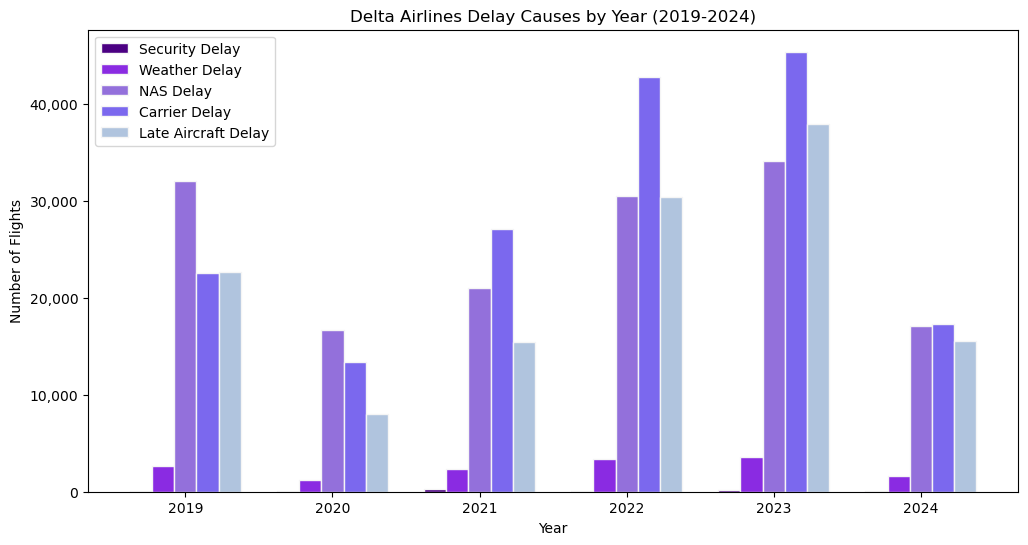

In [43]:
# Filter data for Delta Airline and for years 2019-2024
delta_data = carrier_sum_year[
    (carrier_sum_year['Airlines'].str.strip().str.lower() == 'delta airlines') &
    (carrier_sum_year['year'].between(2019, 2024))
]

# Export the filtered data to a CSV file
delta_data.to_csv('output/Delta_Airlines_Delays_2019_2024.csv', index=False)

# Group data by Delta airline, year and sum the delay causes
delta_totals_by_year = delta_data.groupby('year').sum()

# Prepare the data for plotting
delay_causes = ['Security Delay', 'Weather Delay', 'NAS Delay', 'Carrier Delay',  'Late Aircraft Delay']
years = delta_totals_by_year.index
bar_width = 0.15

# Colors for each type of delay
colors = {
    'Security Delay': 'indigo',
    'Weather Delay': 'blueviolet',
    'NAS Delay': 'mediumpurple',
    'Carrier Delay': 'mediumslateblue',
    'Late Aircraft Delay': 'lightsteelblue'
}

# Create the bar chart with side-by-side bars
plt.figure(figsize=(12, 6))

# Generate bars for each delay cause with the same color across all years
for i, cause in enumerate(delay_causes):
    plt.bar(
        [year + i * bar_width for year in years], 
        delta_totals_by_year[cause], 
        width=bar_width, 
        label=cause, 
        color=colors[cause],
        edgecolor='whitesmoke'
    )

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Delta Airlines Delay Causes by Year (2019-2024)')
plt.xticks([year + bar_width * 2 for year in years], years)  # Center the x-ticks
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Delta_Airlines_Delay_Causes_by_Year.png', bbox_inches='tight')

# Show the plot
plt.show()

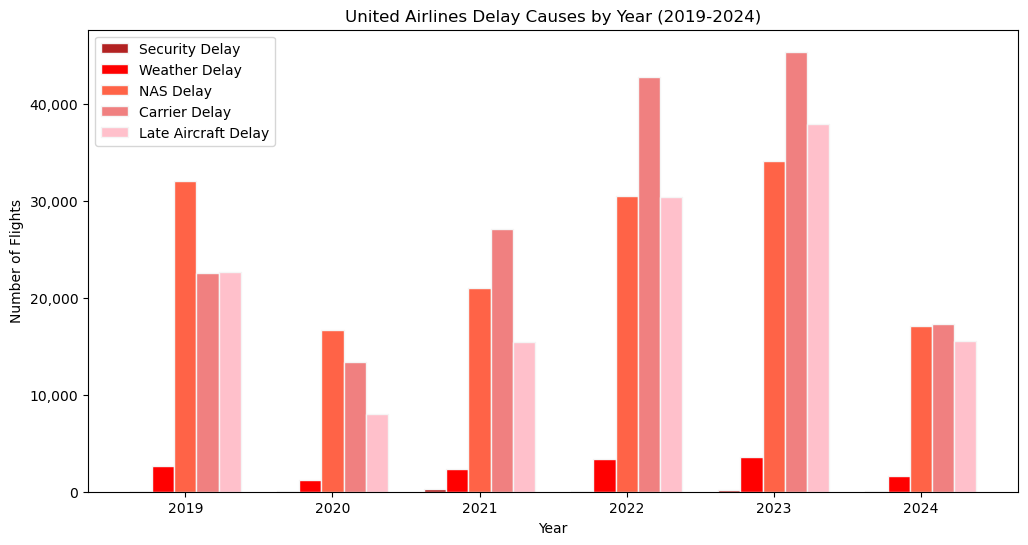

In [44]:
# Filter data for United Airline and for years 2019-2024
united_data = carrier_sum_year[
    (carrier_sum_year['Airlines'].str.strip().str.lower() == 'united airlines') &
    (carrier_sum_year['year'].between(2019, 2024))
]

# Export the filtered data to a CSV file
united_data.to_csv('output/United_Airlines_Delays_2019_2024.csv', index=False)

# Group data by United airline, year and sum the delay causes
united_totals_by_year = united_data.groupby('year').sum()

# Prepare the data for plotting
delay_causes = ['Security Delay', 'Weather Delay', 'NAS Delay', 'Carrier Delay',  'Late Aircraft Delay']
years = united_totals_by_year.index
bar_width = 0.15

# Colors for each type of delay
colors = {
    'Security Delay': 'firebrick',
    'Weather Delay': 'red',
    'NAS Delay': 'tomato',
    'Carrier Delay': 'lightcoral',
    'Late Aircraft Delay': 'pink'
}

# Create the bar chart with side-by-side bars
plt.figure(figsize=(12, 6))

# Generate bars for each delay cause with the same color across all years
for i, cause in enumerate(delay_causes):
    plt.bar(
        [year + i * bar_width for year in years], 
        delta_totals_by_year[cause], 
        width=bar_width, 
        label=cause, 
        color=colors[cause],
        edgecolor='whitesmoke'
    )

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('United Airlines Delay Causes by Year (2019-2024)')
plt.xticks([year + bar_width * 2 for year in years], years)  # Center the x-ticks
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/United_Airlines_Delay_Causes_by_Year.png', bbox_inches='tight')

# Show the plot
plt.show()

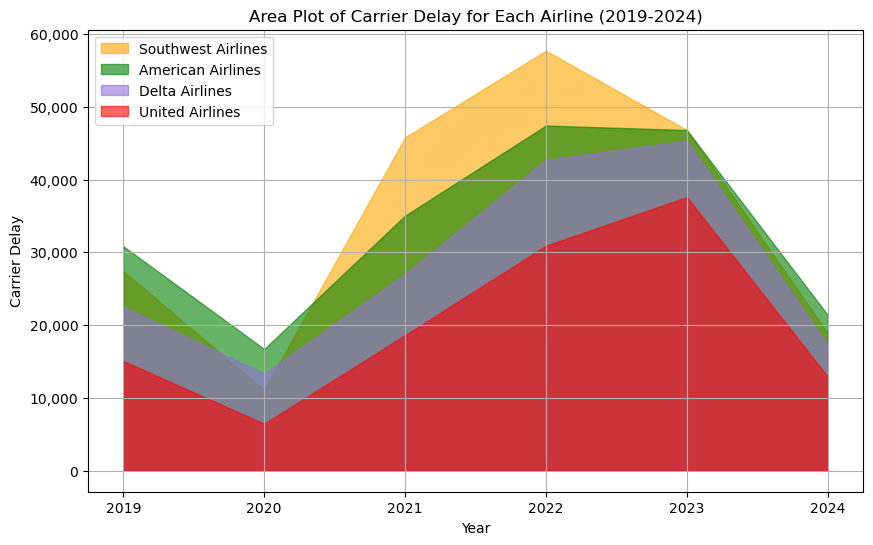

In [45]:
# Convert 'year' and 'Carrier Delay' to numeric, handling errors and missing values
carrier_sum_year['year'] = pd.to_numeric(carrier_sum_year['year'], errors='coerce')
carrier_sum_year['Carrier Delay'] = pd.to_numeric(carrier_sum_year['Carrier Delay'], errors='coerce')

# Calculate the total carrier delay for each airline and order them from high to low
total_delays = carrier_sum_year.groupby('Airlines')['Carrier Delay'].sum().sort_values(ascending=False)
ordered_airlines = total_delays.index

plt.figure(figsize=(10, 6))

# Plot individual area plots for each airline without stacking, ordered by total delay
for airline in ordered_airlines:
    color = airline_colors[airline]
    airlines_data = carrier_sum_year[carrier_sum_year['Airlines'] == airline]
    plt.fill_between(airlines_data['year'], airlines_data['Carrier Delay'], label=airline, color=color, alpha=0.6)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Carrier Delay')
plt.title('Area Plot of Carrier Delay for Each Airline (2019-2024)')
plt.grid(True)

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Change legend location to upper left
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Area Plot Carrier Delay.png', bbox_inches='tight')

# Show the plot
plt.show()

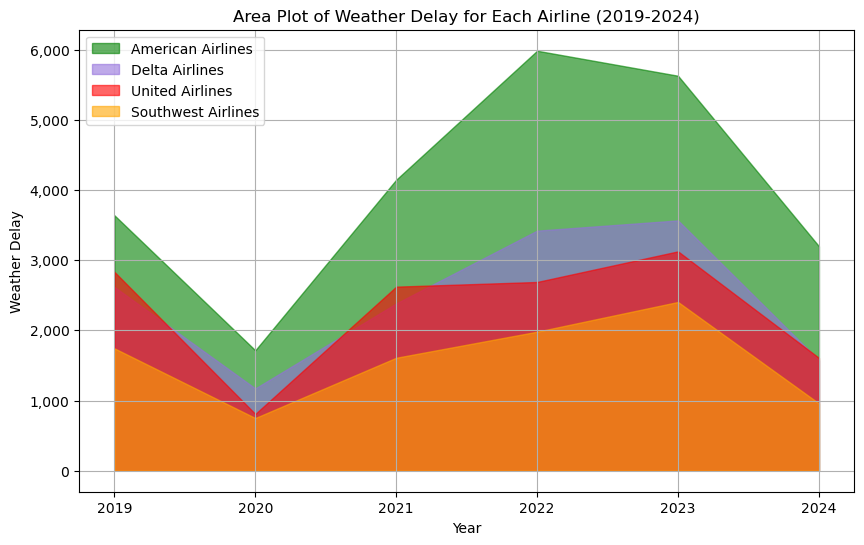

In [46]:
# Convert 'year' and 'Weather Delay' to numeric, handling errors and missing values
carrier_sum_year['year'] = pd.to_numeric(carrier_sum_year['year'], errors='coerce')
carrier_sum_year['Weather Delay'] = pd.to_numeric(carrier_sum_year['Weather Delay'], errors='coerce')

# Calculate the total weather delay for each airline and order them from high to low
total_delays = carrier_sum_year.groupby('Airlines')['Weather Delay'].sum().sort_values(ascending=False)
ordered_airlines = total_delays.index

plt.figure(figsize=(10, 6))

# Plot individual area plots for each airline without stacking, ordered by total delay
for airline in ordered_airlines:
    color = airline_colors[airline]
    airlines_data = carrier_sum_year[carrier_sum_year['Airlines'] == airline]
    plt.fill_between(airlines_data['year'], airlines_data['Weather Delay'], label=airline, color=color, alpha=0.6)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Weather Delay')
plt.title('Area Plot of Weather Delay for Each Airline (2019-2024)')
plt.grid(True)

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Change legend location to upper left
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Area Plot Weather Delay.png', bbox_inches='tight')

# Show the plot
plt.show()

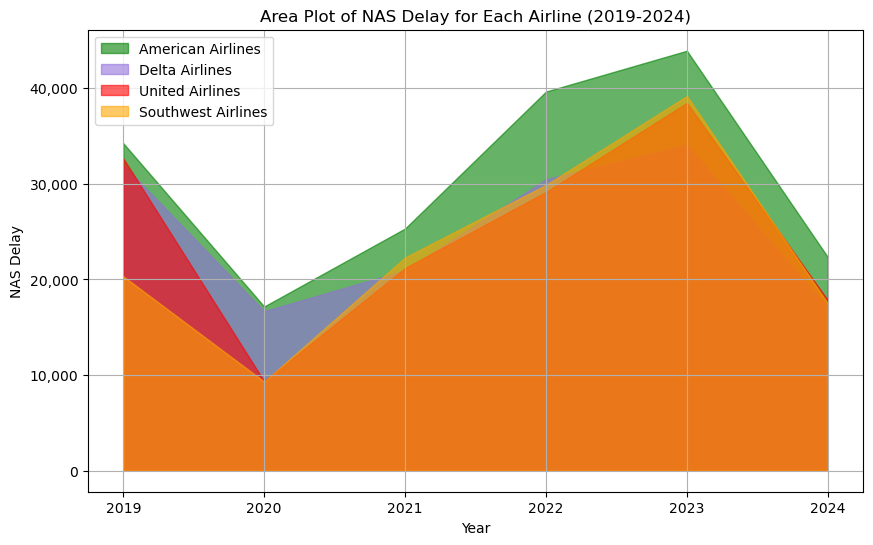

In [47]:
# Convert 'year' and 'NAS delay' to numeric, handling errors and missing values
carrier_sum_year['year'] = pd.to_numeric(carrier_sum_year['year'], errors='coerce')
carrier_sum_year['NAS Delay'] = pd.to_numeric(carrier_sum_year['NAS Delay'], errors='coerce')

# Calculate the total NAS delay for each airline and order them from high to low
total_delays = carrier_sum_year.groupby('Airlines')['NAS Delay'].sum().sort_values(ascending=False)
ordered_airlines = total_delays.index

plt.figure(figsize=(10, 6))

# Plot individual area plots for each airline without stacking, ordered by total delay
for airline in ordered_airlines:
    color = airline_colors[airline]
    airlines_data = carrier_sum_year[carrier_sum_year['Airlines'] == airline]
    plt.fill_between(airlines_data['year'], airlines_data['NAS Delay'], label=airline, color=color, alpha=0.6)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('NAS Delay')
plt.title('Area Plot of NAS Delay for Each Airline (2019-2024)')
plt.grid(True)

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Change legend location to upper left
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Area Plot NAS Delay.png', bbox_inches='tight')

# Show the plot
plt.show()

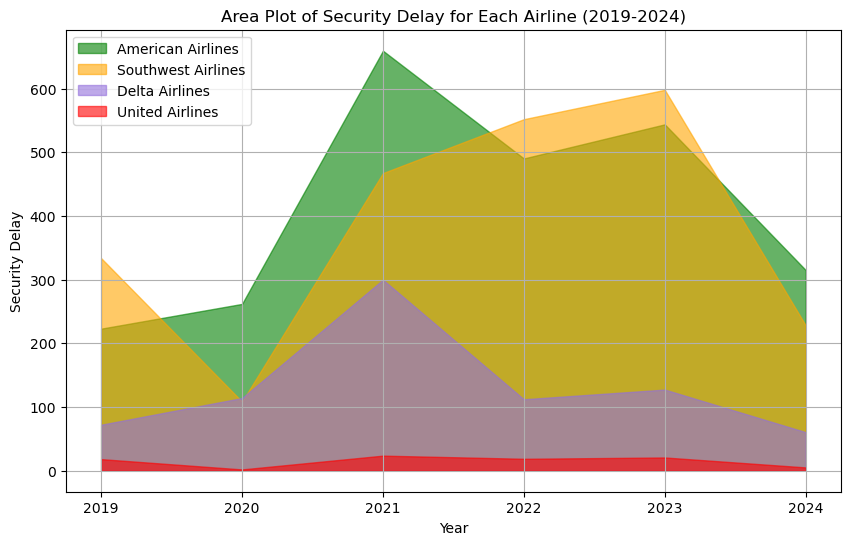

In [48]:
# Convert 'year' and 'Security Delay' to numeric, handling errors and missing values
carrier_sum_year['year'] = pd.to_numeric(carrier_sum_year['year'], errors='coerce')
carrier_sum_year['Security Delay'] = pd.to_numeric(carrier_sum_year['Security Delay'], errors='coerce')

# Calculate the total security delay for each airline and order them from high to low
total_delays = carrier_sum_year.groupby('Airlines')['Security Delay'].sum().sort_values(ascending=False)
ordered_airlines = total_delays.index

plt.figure(figsize=(10, 6))

# Plot individual area plots for each airline without stacking, ordered by total delay
for airline in ordered_airlines:
    color = airline_colors[airline]
    airlines_data = carrier_sum_year[carrier_sum_year['Airlines'] == airline]
    plt.fill_between(airlines_data['year'], airlines_data['Security Delay'], label=airline, color=color, alpha=0.6)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Security Delay')
plt.title('Area Plot of Security Delay for Each Airline (2019-2024)')
plt.grid(True)

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Change legend location to upper left
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Area Plot Security Delay.png', bbox_inches='tight')

# Show the plot
plt.show()

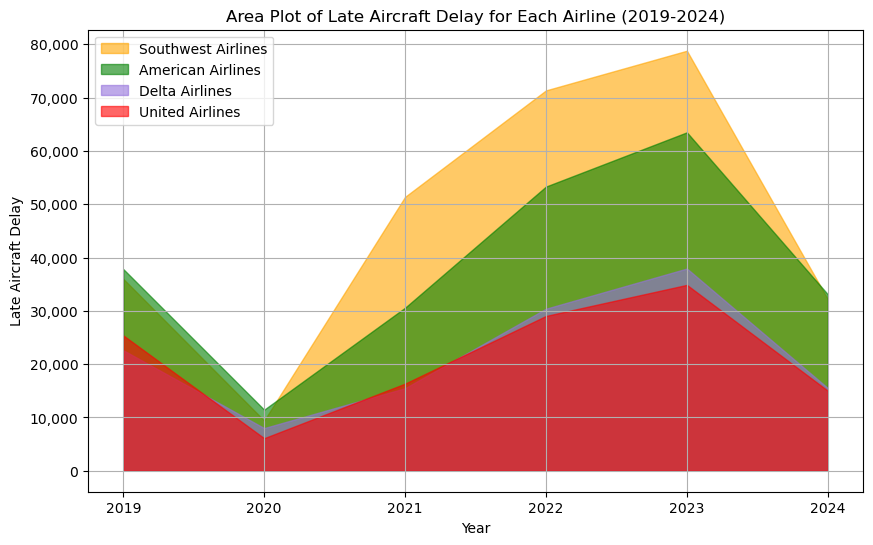

In [49]:
# Convert 'year' and 'Late Aircraft Delay' to numeric, handling errors and missing values
carrier_sum_year['year'] = pd.to_numeric(carrier_sum_year['year'], errors='coerce')
carrier_sum_year['Late Aircraft Delay'] = pd.to_numeric(carrier_sum_year['Late Aircraft Delay'], errors='coerce')

# Calculate the total late aircraft delay for each airline and order them from high to low
total_delays = carrier_sum_year.groupby('Airlines')['Late Aircraft Delay'].sum().sort_values(ascending=False)
ordered_airlines = total_delays.index

# Create the figure for an unstacked area plot of late aircraft delay for each airline, ordered by delay from low to high
plt.figure(figsize=(10, 6))

# Plot individual area plots for each airline without stacking, ordered by total delay
for airline in ordered_airlines:
    color = airline_colors[airline]
    airlines_data = carrier_sum_year[carrier_sum_year['Airlines'] == airline]
    plt.fill_between(airlines_data['year'], airlines_data['Late Aircraft Delay'], label=airline, color=color, alpha=0.6)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Late Aircraft Delay')
plt.title('Area Plot of Late Aircraft Delay for Each Airline (2019-2024)')
plt.grid(True)

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Change legend location to upper left
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('output/Area Plot Late Aircraft Delay.png', bbox_inches='tight')

# Show the plot
plt.show()